# 04. Pytorch Custom Datasets

We've used some datasets with pytorch before

But how do you get your own data into Pytorch?

One of the ways to do that is via: Custom Datasets

## Domain Libraries

Depending on what you are working on, vision, text, audio, etc..
youll want to look into each of the pytorch domain libraries for existing data loading functions and customizable data loading functions.

## 0. Importing Pytorch and setting up device agnostic code

In [ ]:
import torch
from torch import nn

torch.__version__

'2.1.0+cu121'

In [ ]:
# Set up device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


## 1. Get the data
Our dataset is a subset of the food101 Dataset

Food 101 Starts with 101 different classes of food and (1000 images) per class (750 training per class and 250 testing)

Our dataset starts with only 3 different classes of food and only 10% of the images (75 training and 25 for testing)

Why should we do it this way?

When starting on ML projects, its import to start things on a small scale first then increase the scale when its absolutely necessary

In [ ]:
import requests
import zipfile
from pathlib import Path

# Set up a path to a data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If our image doesnt exists download and prepare it....
if image_path.is_dir():
  print(f"{image_path} directory already exist... skipping the download ")
else:
  print(f"{image_path} does not exist... creating one")
  image_path.mkdir(parents=True, exist_ok=True)

# download pizza, steak and sushi data
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  requests = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip") # remember you need the raw version
  print("downloading pizza, steak, and sushi data...")
  f.write(requests.content)

# Unzip pizza steak sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  print("Unzipping pizza, steak, and sushi data...")
  zip_ref.extractall(image_path)

data/pizza_steak_sushi directory already exist... skipping the download 
downloading pizza, steak, and sushi data...
Unzipping pizza, steak, and sushi data...


## 2. Data preparation and data exploration

In [ ]:
import os


In [ ]:
def walk_through_dir(dir_path):
  """ Walks through dir_path returns its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")


In [ ]:
walk_through_dir(image_path)

There are 2 directories and 0 images in data/pizza_steak_sushi
There are 3 directories and 0 images in data/pizza_steak_sushi/test
There are 0 directories and 25 images in data/pizza_steak_sushi/test/pizza
There are 0 directories and 19 images in data/pizza_steak_sushi/test/steak
There are 0 directories and 31 images in data/pizza_steak_sushi/test/sushi
There are 3 directories and 0 images in data/pizza_steak_sushi/train
There are 0 directories and 78 images in data/pizza_steak_sushi/train/pizza
There are 0 directories and 75 images in data/pizza_steak_sushi/train/steak
There are 0 directories and 72 images in data/pizza_steak_sushi/train/sushi


In [ ]:
# Set up train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

### 2.1 Visualizing an image

Lets write some code to:
1. get all of the images paths
2. pick a random image path using pythons random.choice()
3. get the image class name using `pathlib.Path.parent.stem`
4. open the image with Python's PIL
5. We'll then show the image and print metadata



In [ ]:
# /content/data/pizza_steak_sushi

Random image path: data/pizza_steak_sushi/train/pizza/3338774.jpg
image class: pizza
image height: 289
image width: 512


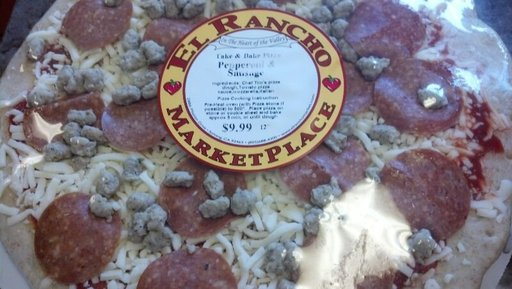

In [ ]:
import random
from PIL import Image

# Set the seeed
# random.seed(42)

# 1. get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg")) # * means anything in that directory -- /content/data/pizza_steak_sushi.jpg

# 2. pick a random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem # stem is the end of the folder

# 4. open image
img = Image.open(random_image_path)

# 5. print meta data
print(f"Random image path: {random_image_path}")
print(f"image class: {image_class}")
print(f"image height: {img.height}")
print(f"image width: {img.width}")
img

(-0.5, 511.5, 288.5, -0.5)

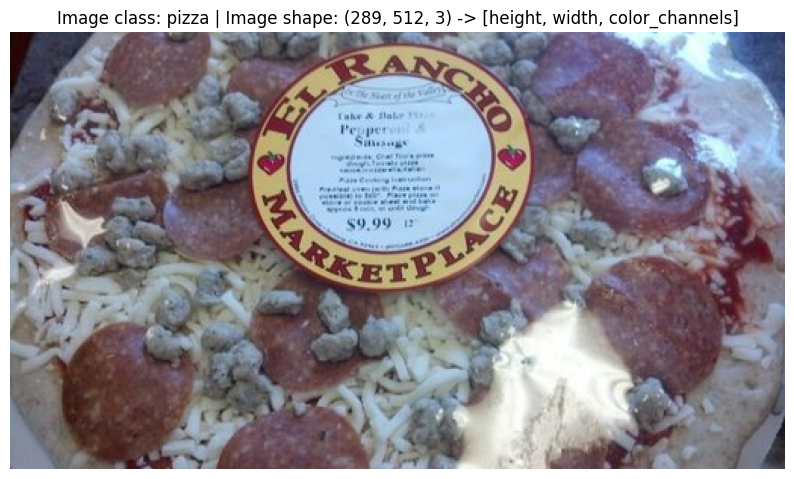

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# turn the image into and array
img_as_array = np.asarray(img)

# plot the image in matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False)

In [ ]:
img_as_array

array([[[ 25,   6,   2],
        [ 27,   8,   4],
        [ 32,   8,   6],
        ...,
        [ 46,  58,  98],
        [ 49,  58,  99],
        [ 48,  57,  98]],

       [[ 25,   6,   2],
        [ 28,   7,   4],
        [ 33,   9,   7],
        ...,
        [ 50,  62, 102],
        [ 50,  59, 100],
        [ 47,  56,  97]],

       [[ 26,   7,   3],
        [ 29,   8,   5],
        [ 33,   9,   7],
        ...,
        [ 50,  62, 102],
        [ 48,  57,  98],
        [ 44,  53,  94]],

       ...,

       [[123, 132, 149],
        [126, 135, 152],
        [129, 138, 155],
        ...,
        [ 64,  58,  68],
        [ 66,  58,  69],
        [ 67,  59,  70]],

       [[119, 126, 142],
        [122, 131, 146],
        [127, 136, 153],
        ...,
        [ 66,  63,  74],
        [ 66,  60,  72],
        [ 65,  59,  71]],

       [[ 79,  86,  96],
        [121, 129, 140],
        [130, 137, 153],
        ...,
        [ 71,  69,  82],
        [ 73,  69,  83],
        [ 67,  63,  77]]

## 3. Transforming data

Before we can use our image with pytorch:

1. turn your target data into tensors
2. turn it into a `torch.utils.data.Dataset` and subsequently a `torch.utils.data.DataLoader`, we'll call these `Dataset` and `DataLoader`




In [ ]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

### 3.1 Tranforming data with `torchvision.transforms`

Transforms help you get your images ready to be used with a model/perform data augmentation

In [ ]:
# write a transform for image
data_transform = transforms.Compose([
    # resize our images to 64x64
    transforms.Resize(size=(64, 64)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5),
    # Turn the image into a torch tensor
    transforms.ToTensor()
])

In [ ]:
data_transform(img)

tensor([[[0.1412, 0.1529, 0.2039,  ..., 0.2157, 0.2078, 0.1961],
         [0.1451, 0.1608, 0.2196,  ..., 0.2118, 0.2039, 0.2118],
         [0.1490, 0.1843, 0.2314,  ..., 0.2431, 0.2196, 0.2353],
         ...,
         [0.5098, 0.5216, 0.4902,  ..., 0.4627, 0.3725, 0.2039],
         [0.5098, 0.5216, 0.5098,  ..., 0.4549, 0.3059, 0.1922],
         [0.5059, 0.5216, 0.5176,  ..., 0.4471, 0.3255, 0.2510]],

        [[0.0235, 0.0510, 0.1961,  ..., 0.2980, 0.2784, 0.2510],
         [0.0275, 0.0824, 0.2196,  ..., 0.2941, 0.2745, 0.2667],
         [0.0235, 0.1216, 0.2392,  ..., 0.3216, 0.2902, 0.2902],
         ...,
         [0.5412, 0.5451, 0.5137,  ..., 0.4745, 0.3804, 0.2000],
         [0.5412, 0.5451, 0.5373,  ..., 0.4706, 0.3137, 0.1804],
         [0.5373, 0.5451, 0.5490,  ..., 0.4627, 0.3294, 0.2353]],

        [[0.0235, 0.0745, 0.2588,  ..., 0.4941, 0.4510, 0.4118],
         [0.0235, 0.1137, 0.3059,  ..., 0.4941, 0.4510, 0.4314],
         [0.0275, 0.1647, 0.3294,  ..., 0.5255, 0.4706, 0.

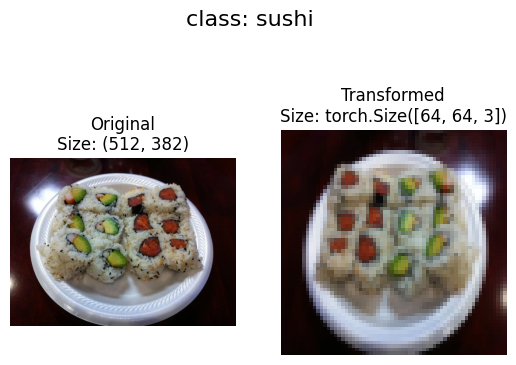

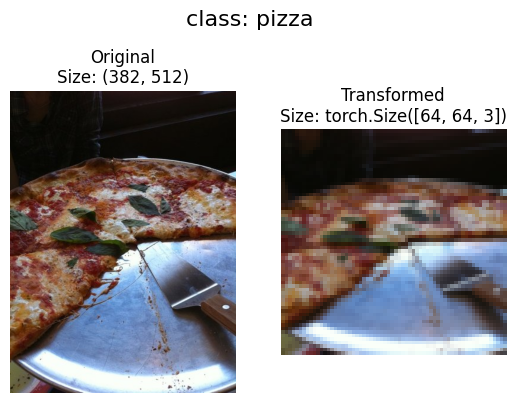

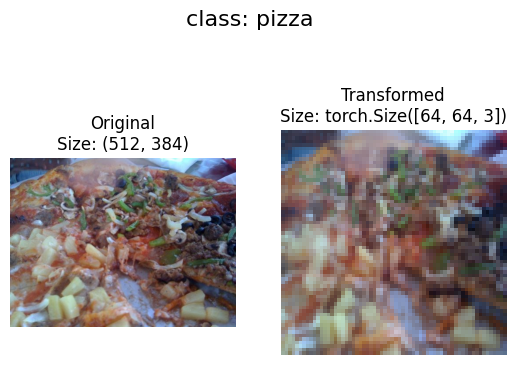

In [ ]:
def plot_transformed_images(image_paths: list, transform, n=3, seed=None):
  """ Selects random images from a path of images and loads/transform them then
  plots the original vs the transformed version."""
  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original\nSize: {f.size}")
      ax[0].axis(False)

      # Transform and plot target image
      transformed_image = transform(f).permute(1, 2, 0) # note that we will need to change the shape for matplotlib (C, H, W) -> (H, W, C)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed\nSize: {transformed_image.shape}")
      ax[1].axis(False)

      fig.suptitle(f"class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_paths=image_path_list,
                        transform=data_transform,
                        n=3,
                        seed=42)

## 4. Option 1: Load image data using `ImageFolder`

We can load image classification data using `torchvision.datasets.ImageFolder`


In [ ]:
# Use Image folder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform, # a transform for the data
                                  target_transform=None) # a transform for the label/target

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [ ]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [ ]:
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
# Check the length of our datasets
len(train_data), len(test_data)

(225, 75)

In [ ]:
# index on the train_data Dataset to get a single image and label
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n {img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype {img.dtype}")
print(f"image label: {label}")
print(f" label datatype: {type(label)}")

Image tensor:
 tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.0

Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
permuted shape: torch.Size([64, 64, 3]) -> [height, width, color_channels]


Text(0.5, 1.0, 'pizza')

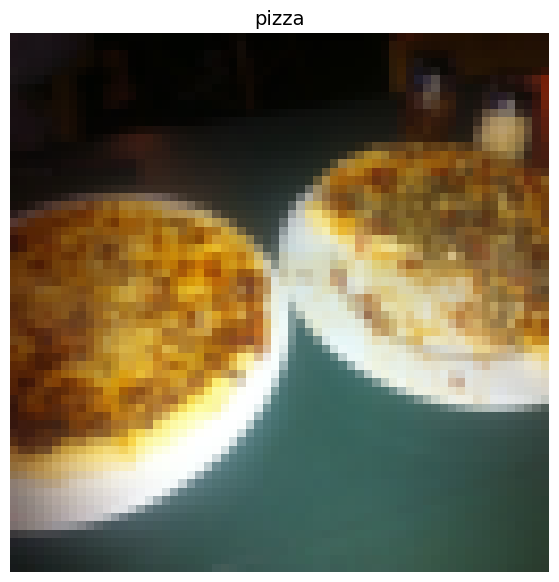

In [ ]:
# Rearrange the order of dimensions
img_permute = img.permute(1, 2, 0)

# Print out different shapes
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"permuted shape: {img_permute.shape} -> [height, width, color_channels]")

# plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label], fontsize=14)

## 4.1 turn loaded images into data loaders

A `DataLoader` is going to help us turn our `Dataset`'s into iterables and we can customize the batch size so our model can see `batch_size` images at a time

In [ ]:
import os
os.cpu_count()

2

In [ ]:
# turn train and test data into dataloader's
from torch.utils.data import DataLoader
BATCH_SIZE = 1
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=os.cpu_count(),
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=os.cpu_count(),
                             shuffle=False)

In [ ]:
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7b669c610130>,
 <torch.utils.data.dataloader.DataLoader at 0x7b669774c100>)

In [ ]:

img, label = next(iter(train_dataloader))
print(f"image shape: {img.shape} [batch size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

image shape: torch.Size([1, 3, 64, 64]) [batch size, color_channels, height, width]
Label shape: torch.Size([1])


## 5 Option 2: Loading Image data with Custom `Dataset`

1. want to be able to load images from file
2. want to be able to class names from dataset
3. want to be able to get classes as dict

Pros:
* Can Create a `Dataset` out of almost anything
* Not limited to pytorch pre-built `Dataset` functions

cons:
* Even though you could create `Dataset` out of almost anything,  it doesnt mean it will work...
* Using a custom `Dataset` often results in us writing more code, which could be prone to errors or perfomance issues

**All custom Datasets in pytorch often subclass - torch.utils.data.Dataset **


In [ ]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [ ]:
# Instance of torchvision.datasets.ImageFolder()
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.1 Creating a helper function to get class names

We want a function to:
1. get the class names using `os.scandir()` to traverse a target directory (ideally the directory is in standard image classification format)
2. Raise an error if the class names arent found (if this happens, ther might be something wrong with the directory structure)
3. turn the class names into a dict and a list and return them

In [ ]:
# setup path for target directory
target_directory = train_dir
print(f"target dir: {target_directory}")

# get the class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

target dir: data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [ ]:
list(os.scandir(target_directory))

[<DirEntry 'pizza'>, <DirEntry 'steak'>, <DirEntry 'sushi'>]

In [ ]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
  """ Finds the class folder names in a target directory """
  # 1. Get the class names by scanning the target directory
  classes = sorted(entry.name for entry in os.scandir(target_directory) if entry.is_dir())

  # 2. Raise an error if class names could not be found
  if not classes:
    raise FileNotFoundError(f"Couldn't find any classes in {directory}.... please check the file structure.")

  # 3. Create a dictionary of index labels (computers prefer numbers rather than strings as labels)
  class_to_idx = {class_name: i for i, class_name in enumerate(classes)}
  return classes, class_to_idx

In [ ]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.2 Create a custom `Dataset` to replicate `ImageFolder`

To create our own custom dataset,  we want to:

1. Subclass `torch.utils.data.Dataset`
2. init our subclass with a target directory (the directory we'd like to get data from) as well as a transform if we'd like to transform our data
3. Create several attributes:
  *   paths - paths of our images
  * transform - the transform we'd like to use
  * classes - a list of the target classes
  * class_to_idx - a dict of the target classes mapped to integer labels
4. Create a function to `load_images()`, this function will open an image
5. Overwrite the `__len()__` method to return the length of our dataset
6. Overwrite the `__getitem()__` method to return a given sample when passed an index

In [ ]:
# 0. Write a custom dataset class
from torch.utils.data import Dataset

# 1. subclass torch.utils.data.Dataset
class ImageFolderCustomer(Dataset):
  # 2. Initialize our custom dataset
  def __init__(self,
               targ_dir: str,
               transform=None):
    # 3. Create class attributes
    # Get all of the image paths
    self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
    # Setup transforms
    self.transform = transform
    # Create classes and class_to_idx attributes
    self.classes, self.class_to_idx = find_classes(targ_dir)

  # create a function to load images
  def load_image(self, index: int) -> Image.Image:
    "Opens an image via a path and returns it."
    image_path = self.paths[index]
    return Image.open(image_path)

  # 5. overwrite __len__()
  def __len__(self) -> int:
    "Returns the total number of samples"
    return len(self.paths)

  # 6. overwrite __getitem__() method to return our particular sample
  def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
    "Returns one sample of data,  data and label (X, y)"
    img = self.load_image(index)
    class_name = self.paths[index].parent.name # expects path in format: data_folder/class_name/image.jpg
    class_idx = self.class_to_idx[class_name]

    # Transform if necessary
    if self.transform:
      return self.transform(img), class_idx # return data, label (X, y)
    else:
      return img, class_idx # return untransformed image and a label

In [ ]:
# Create a transform
from torchvision import transforms
train_transforms = transforms.Compose([
                                      transforms.Resize(size=(64, 64)),
                                      transforms.RandomHorizontalFlip(p=0.5),
                                      transforms.ToTensor()
])

test_transforms = transforms.Compose([
                                      transforms.Resize(size=(64)),
                                      transforms.ToTensor()
])

In [ ]:
# Test out image folder custom
train_data_custom = ImageFolderCustomer(targ_dir=train_dir,
                                        transform=train_transforms)

test_data_custom = ImageFolderCustomer(targ_dir=test_dir,
                                       transform=test_transforms)

In [ ]:
train_data_custom, test_data_custom

(<__main__.ImageFolderCustomer at 0x7b669c612980>,
 <__main__.ImageFolderCustomer at 0x7b669c610850>)

In [ ]:
len(train_data), len(train_data_custom)

(225, 225)

In [ ]:
len(test_data),  len(test_data_custom)

(75, 75)

In [ ]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [ ]:
train_data_custom.transform

Compose(
    Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
    RandomHorizontalFlip(p=0.5)
    ToTensor()
)

In [ ]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
# Check for equality between original ImageFolder Dataset and ImageFolderCustom Dataset
print(train_data_custom.classes == train_data.classes)
print(test_data_custom.classes == test_data.classes)

True
True


### 5.3 Create a function to display random images

1. take in a `Dataset` and a number of other parameters such as class names and how many images to visualize.
2. To prevent the display getting out of hand, lets cap the number of images to see at 10
3. Set the random seed for reproducibility
4. Get a list of random sample indexes from the target dataset.
5. Setup a matplotlib plot.
6. Loop through the random sample indexes and plot them with matplotlib
7. make sure the dimensions line up with matplotlib (height, width, color_channels)
`

In [ ]:
# 1. Create a function to take in a dataset
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
  # 2. Adjust display if n is too high
  if n > 10:
    n = 10
    display_shape = False
    print(f"For display purposes, n shouldnt be larger than 10, setting n to 10 and removing shape display.")

  # 3. set the seed
  if seed:
    random.seed(seed)

  # 4. get random sample indexes
  random_samples_idx = random.sample(range(len(dataset)), k=n)

  # 5. Set up the plot
  plt.figure(figsize=(16, 8))

  # 5. Loop through random indexes and plot them in matplotlib
  for i, targ_sample in enumerate(random_samples_idx):
    targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

    # 7. Adjust tensor dimensions for plotting
    targ_image_adjust = targ_image.permute(1, 2, 0) # [color_channels, Height, width] -> [Height,  width,  color_channels]

    # plot adjusted samples
    plt.subplot(1, n, i+1)
    plt.imshow(targ_image_adjust)
    plt.axis("off")
    if classes:
      title = f"Class: {classes[targ_label]}"
      if display_shape:
        title = title + f"\nshape: {targ_image_adjust.shape}"
    plt.title(title)

In [ ]:
random.sample(range(len(train_data_custom)), k=10)

[62, 57, 35, 188, 26, 173, 189, 139, 22, 151]

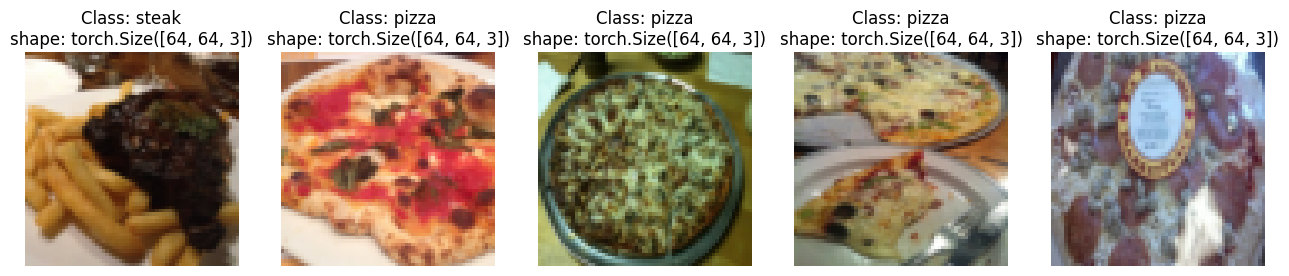

In [ ]:
# Display random images from the ImageFolder
display_random_images(train_data,
                      n=5,
                      classes=train_data.classes,
                      seed=None)

For display purposes, n shouldnt be larger than 10, setting n to 10 and removing shape display.


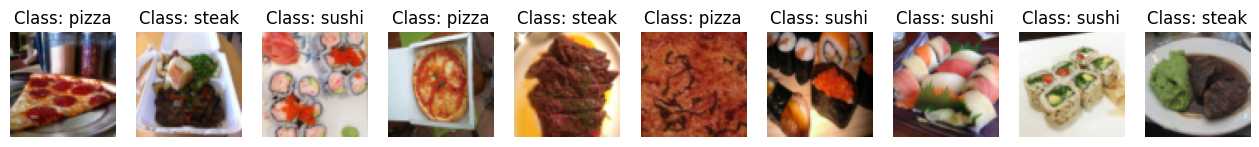

In [ ]:
display_random_images(dataset=train_data_custom,
                      classes=class_names,
                      n=20,
                      seed=None)

In [ ]:
class_names, train_data.classes

(['pizza', 'steak', 'sushi'], ['pizza', 'steak', 'sushi'])

### 5.4 Turn Custom loaded images into DataLoaders

In [ ]:
from torch.utils.data import Dataset
BATCH_SIZE = 32
train_dataloader_custom = DataLoader(dataset=train_data_custom,
                                     batch_size=BATCH_SIZE,
                                     num_workers=0,
                                     shuffle=True)

test_dataloader_custom = DataLoader(dataset=test_data_custom,
                                    batch_size=BATCH_SIZE,
                                    num_workers=0)

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7b66b822bd00>,
 <torch.utils.data.dataloader.DataLoader at 0x7b66b8557a60>)

In [ ]:
img_custom, label_custom = next(iter(train_dataloader_custom))

# print out the shapes
img_custom.shape, label_custom.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

## 6.Other forms of transforms (data augmentation)

Data augmentation is the process of artificially adding diversity to your training data.

In the case of image data, this may mean applying various image transformations to the training image.

This practice hopefully results in a model thats more generalizable to unseen data.

Lets take a look at one particular type of data augmentation used to train pytorch vision models to state of the art levels...



In [ ]:
# lets look at trivial augment

from torchvision import transforms

train_transform = transforms.Compose([
                                      transforms.Resize(size=(224, 224)),
                                      transforms.TrivialAugmentWide(num_magnitude_bins=31), # 0 -31 how intense you want the augment to be
                                      transforms.ToTensor()
])

test_transform = transforms.Compose([
                                     transforms.TrivialAugmentWide(num_magnitude_bins=31),
                                     transforms.ToTensor()
])

In [ ]:
# Get all the image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list[:10]

[PosixPath('data/pizza_steak_sushi/test/pizza/2218680.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/2236338.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/1925494.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/930553.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/1152100.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/971934.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/195160.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/2003290.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/2508636.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/1503858.jpg')]

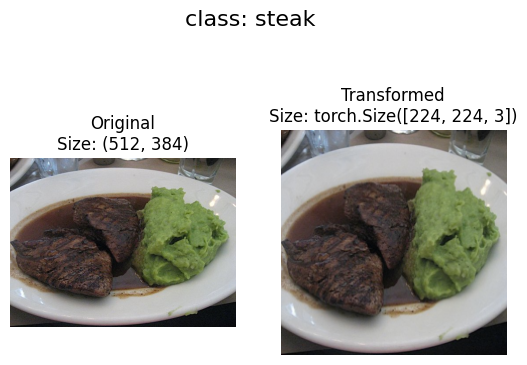

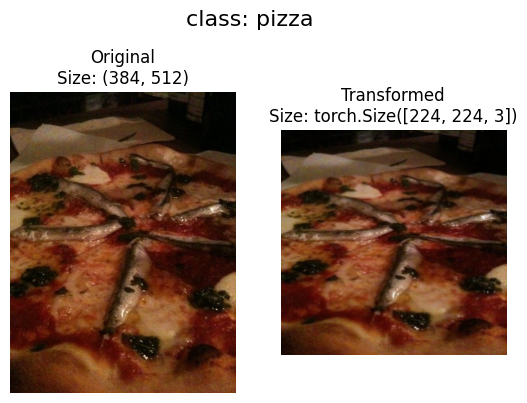

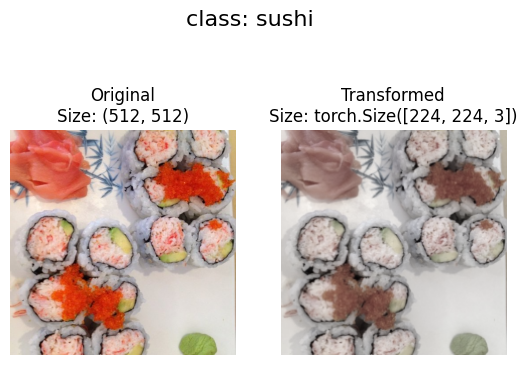

In [ ]:
# plot random images

plot_transformed_images(
    image_paths=image_path_list,
    transform=train_transform,
    n=3,
    seed=None
)

## 7.0 Model 0: TinyVGG without data augmentation

Lets replicate TinyVGG architecture from the CNN Explainer website

### 7.1 Creating transforms and loading data for Model 0

In [ ]:
# Create a simple transform
simple_tranform = transforms.Compose([
                                      transforms.Resize(size=(64, 64)),
                                      transforms.ToTensor()
])

In [ ]:
# 1. Load and tranforms data
from torchvision import datasets

train_data_simple = datasets.ImageFolder(root=train_dir,
                                         transform=simple_tranform)

test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=simple_tranform)

# 2. turn the datasets into Dataloaders
import os
from torch.utils.data import DataLoader

BATCH_SIZE = 32

num_workers = os.cpu_count()

train_dataloader_simple = DataLoader(dataset=train_data_simple,
                                     batch_size=BATCH_SIZE,
                                     num_workers=num_workers,
                                     shuffle=True)

test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    num_workers=num_workers,
                                    shuffle=False)



### 7.2 Create tinyVGG Model class

In [ ]:
class TinyVGG(nn.Module):
  """
  Model architecture copying TinyVGG from CNN Explainer
  """
  def __init__(self, input_shape: int,
               hidden_units: int,
               output_shape: int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2) # default stride value is the same as the kernel_size
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2) # default stride value is the same as the kernel_size
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*13*13,
                  out_features=output_shape)
    )
  def forward(self, x):
    x = self.conv_block_1(x)
    # print(x.shape)
    x = self.conv_block_2(x)
    # print(x.shape)
    x = self.classifier(x)
    # print(x.shape)
    return x

In [ ]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)

model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

### 7.3 Try a forward pass on a single image(to test the model)

In [ ]:
# Get a single image
image_batch, label_batch = next(iter(train_dataloader_simple))
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [ ]:
# Try a forward pass
model_0(image_batch.to(device))

tensor([[ 2.0795e-02, -1.9510e-03,  9.5212e-03],
        [ 1.8440e-02,  2.4668e-03,  6.6609e-03],
        [ 1.7695e-02,  1.0282e-03,  9.4975e-03],
        [ 2.4446e-02, -3.3489e-03,  9.5877e-03],
        [ 1.9939e-02,  6.9131e-04,  1.0778e-02],
        [ 2.1281e-02,  2.0434e-03,  5.0046e-03],
        [ 2.0996e-02,  1.6415e-04,  1.2481e-02],
        [ 2.1566e-02, -1.9607e-03,  9.7175e-03],
        [ 2.4500e-02, -4.7904e-03,  8.5394e-03],
        [ 2.0239e-02, -4.7979e-04,  1.0907e-02],
        [ 2.2219e-02, -4.1816e-04,  9.8173e-03],
        [ 2.2318e-02, -2.1642e-03,  9.4428e-03],
        [ 2.1851e-02, -3.7225e-03,  8.3784e-03],
        [ 2.2881e-02, -1.7559e-03,  1.0299e-02],
        [ 2.1635e-02, -4.3995e-03,  9.4990e-03],
        [ 2.2101e-02, -4.1469e-03,  9.3904e-03],
        [ 2.1226e-02, -4.4215e-03,  1.1476e-02],
        [ 2.1698e-02, -2.7458e-03,  8.4966e-03],
        [ 1.9974e-02, -3.1665e-07,  8.4496e-03],
        [ 1.8308e-02,  1.6378e-03,  8.5491e-03],
        [ 2.0768e-02

#### We are getting this error because our forward pass doesnt satisfy the rules for matrix multiplication
* after it is passed through the convblock2 it becomes 10, 16, 16,
* and then it is flattened -> 10 * 16 * 16 = 2560
* so our hidden units output should be hidden_units('10') * 16 *16

### 7.4 Use `torchinfo` to get an idea of the shapes going through our model

In [ ]:
# install torchinfo, import if its available
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo

from torchinfo import summary
summary(model_0, input_size=[1, 3, 64, 64]) # this is would be passing in a batch of one image

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

### 7.5 Create train and test loop functions

* `train_step()` - takes in a model and dataloader and trains the model on the dataloader
* `test_step()` - takes in a model and dataloader and evaluates the model on the dataloader

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
# Create train_step()
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device=device):
  # put the model in train mode
  model.train()

  # set up train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # loop through the dataloader data batches
  for batch, (X, y) in enumerate(dataloader):
    # send the data to the target device
    X, y =  X.to(device), y.to(device)

    # forward pass
    y_pred = model(X)

    # calculate the loss
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    # optimizer.zero_grad()
    optimizer.zero_grad()

    # loss backward
    loss.backward()

    # optimizer step
    optimizer.step()

    # Calculate the accuracy
    y_pred_classes = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_classes==y).sum().item()/len(y_pred)

  # adjust metrics to get average loss and accuracy per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc

In [ ]:
# Create a test step
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device=device):
  # put the model in evaluation mode
  model.eval()

  # setup the testloss and testacc
  test_loss, test_acc = 0, 0

  # Turn on inference mode
  with torch.inference_mode():
    # Loop through the dataloader batches
    for batch, (X, y) in enumerate(dataloader):
      # send the data to the target device
      X, y = X.to(device), y.to(device)

      # do the forward pass
      test_pred_logits = model(X)

      # calculate the loss
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

      # calculate the accuracy
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += (test_pred_labels == y ).sum().item()/len(test_pred_labels)

  # Adjust metrics to get average loss and accuracy per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc

### 7.6 Creating a `train()` function to combine train_step() and test_step()

In [ ]:
from tqdm.auto import tqdm

# 1. Create a train function that takes in various model parameters + optimizer + dataloaders + loss function
def train(model: torch.nn.Module,
          train_dataloader,
          test_dataloader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5,
          device = device):

  # 2. Create empty results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  # 3. Loop through training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer,
                                       device=device)

    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn,
                                    device=device)

    # 4. Print out whats happening
    print(f"Epoch: {epoch} | Train loss: {train_loss:.4f} | Train accuracy: {train_acc:.4f}% | \nTest loss: {test_loss:.4f} | Test acc {test_acc:.4f}%")

    # 5. update results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  # 6. Return the filled results at the end of the epochs
  return results

### 7.7 train and evaluate model 0

In [ ]:
# set the random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set the number of epochs
NUM_EPOCHS = 5

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)

# Set up an loss_function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer
end_time = timer()
total_train_time = end_time - start_time
print(f"Total training time: {total_train_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 1.1025 | Train accuracy: 0.3556% | 
Test loss: 1.0892 | Test acc 0.3867%
Epoch: 1 | Train loss: 1.0336 | Train accuracy: 0.4978% | 
Test loss: 0.9938 | Test acc 0.4133%
Epoch: 2 | Train loss: 0.9707 | Train accuracy: 0.5422% | 
Test loss: 1.0099 | Test acc 0.4933%
Epoch: 3 | Train loss: 0.9317 | Train accuracy: 0.5600% | 
Test loss: 0.9726 | Test acc 0.4533%
Epoch: 4 | Train loss: 0.9038 | Train accuracy: 0.5956% | 
Test loss: 0.9826 | Test acc 0.5200%
Total training time: 13.718 seconds


### 7.8 Plot the loss Curves of model 0
A **loss curve** is a way of tracking your models progress overtime

In [ ]:
# Get the model_0_results keys
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [ ]:
def plot_loss_curves(results: Dict[str, List[float]]):
  """ Plots training curves of a results dictionary """
  # Get the loss values of the results dictionary (training and test)
  loss = results["train_loss"]
  test_loss = results["test_loss"]

  # Get the accuracy values of the results dictionary (training and test)
  accuracy = results["train_acc"]
  test_accuracy = results["test_acc"]

  # figure out how many epochs we have done
  epochs = range(len(results["train_loss"]))

  # set up a plt
  plt.figure(figsize=(15, 7))

  # plot the loss
  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label="Train_loss")
  plt.plot(epochs, test_loss, label="test_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # plot the accuracy
  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, label="train_accuracy")
  plt.plot(epochs, test_accuracy, label="test_accuracy")
  plt.title("accuracy")
  plt.xlabel("Epochs")
  plt.legend()


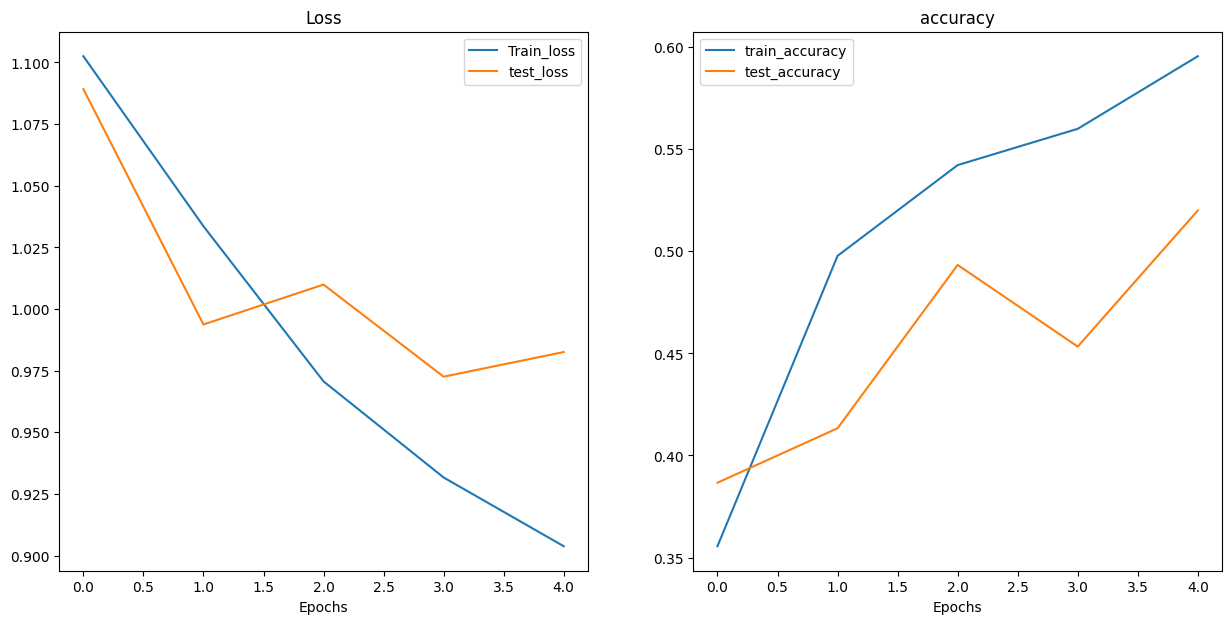

In [ ]:
plot_loss_curves(model_0_results)

## 8. What should an ideal loss curve look like?

A loss curve is one of the most helpful ways to trouble shoot a model

## 9. Model 1: TinyVGG with data Augmentation

Now lets try another modelling experiment this time using the same model as before but with some slight data augmentation


### 9.1 Create transform with data augmentation


In [ ]:
# Create training transform with TrivialAugment
from torchvision import transforms
train_transform_trivial = transforms.Compose([
                                              transforms.Resize(size=(64, 64)),
                                              transforms.TrivialAugmentWide(num_magnitude_bins=31),
                                              transforms.ToTensor()
])

test_transform_simple = transforms.Compose([
                                            transforms.Resize(size=(64, 64)),
                                            transforms.ToTensor()
])

### 9.2 Create train and test `Dataset`'s and `DataLoader`s with data augmentation

In [ ]:
# Turn the image folders into datasets
from torchvision import datasets

train_data_augmented = datasets.ImageFolder(root=train_dir,
                                            transform=train_transform_trivial)

test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=test_transform_simple)

In [ ]:
# Turn our datasets into dataloaders
import os
from torch.utils.data import DataLoader

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented = DataLoader(dataset=train_data_augmented,
                                        batch_size=BATCH_SIZE,
                                        num_workers=NUM_WORKERS,
                                        shuffle=True)

test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                        batch_size=BATCH_SIZE,
                                        num_workers=NUM_WORKERS,
                                        shuffle=False)

In [ ]:
torch.manual_seed(42)
model_1 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data_augmented.classes))

model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [ ]:
model_1.parameters()

<generator object Module.parameters at 0x7b669776d7e0>

In [ ]:
# Set the manual seed
torch.manual_seed(42)

# set the number of epochs
NUM_EPOCHS = 5

# set up the loss functions
loss_fn = nn.CrossEntropyLoss()

# set up the optimizer
optimizer = torch.optim.Adam(params=model_1.parameters(),
                             lr=0.001)

# start the timer
from timeit import default_timer as timer
start_time = timer()

# train model 1
model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS,
                        device=device)

# end the timer and print out how long it took
end_time = timer()
total_train_time = end_time - start_time
print(f"Total training time: {total_train_time:3f} seconds")


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 1.1049 | Train accuracy: 0.2500% | 
Test loss: 1.1019 | Test acc 0.2604%
Epoch: 1 | Train loss: 1.0807 | Train accuracy: 0.4258% | 
Test loss: 1.1261 | Test acc 0.2604%
Epoch: 2 | Train loss: 1.0712 | Train accuracy: 0.4258% | 
Test loss: 1.1593 | Test acc 0.2604%
Epoch: 3 | Train loss: 1.1253 | Train accuracy: 0.3047% | 
Test loss: 1.1581 | Test acc 0.2604%
Epoch: 4 | Train loss: 1.0865 | Train accuracy: 0.4258% | 
Test loss: 1.1554 | Test acc 0.3333%
Total training time: 9.265588 seconds


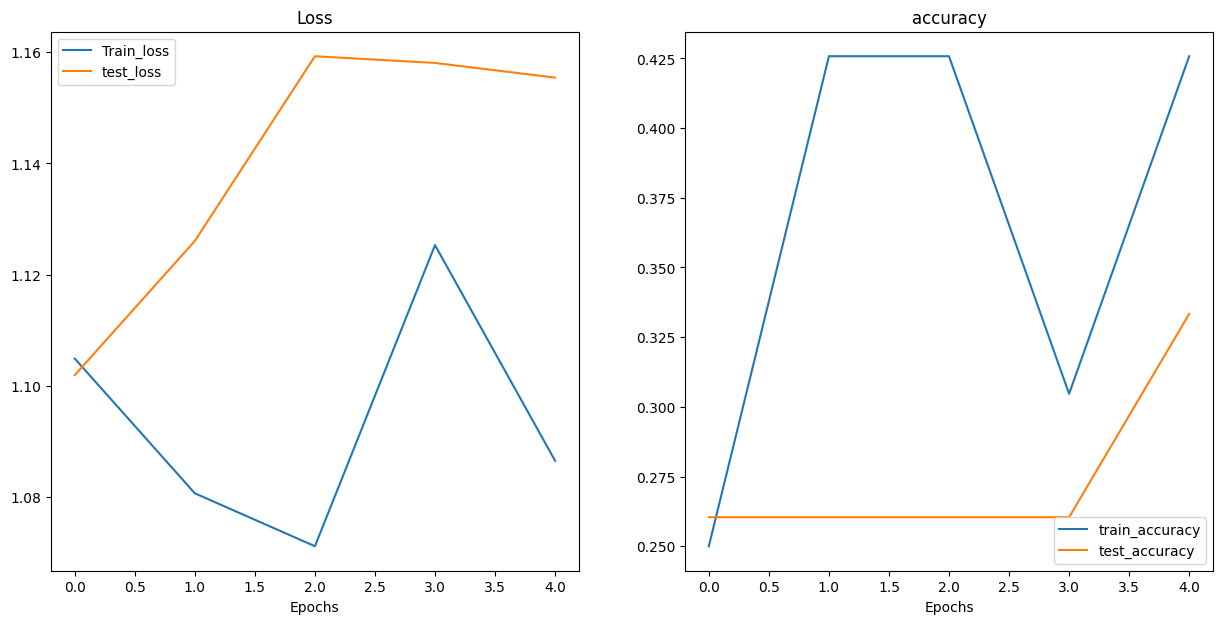

In [ ]:
plot_loss_curves(model_1_results)

## 10. Compare model results to eachother

After comparing our modelling experiments on their own, its important to compare them to eachother.

Theres a few different ways to do this:
1. Hard coding (what we are doing)
2. Pytorch + tensorboard - https://pytorch.org/tutorials/recipes/recipes/tensorboard_with_pytorch.html
3. weights and biases - https://docs.wandb.ai/guides/integrations/pytorch
4. MLFlow - https://mlflow.org/

In [ ]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df

train_loss  train_acc  test_loss  test_acc
0    1.102525   0.355556   1.089209  0.386667
1    1.033582   0.497778   0.993759  0.413333
2    0.970675   0.542222   1.009931  0.493333
3    0.931712   0.560000   0.972588  0.453333
4    0.903843   0.595556   0.982583  0.520000

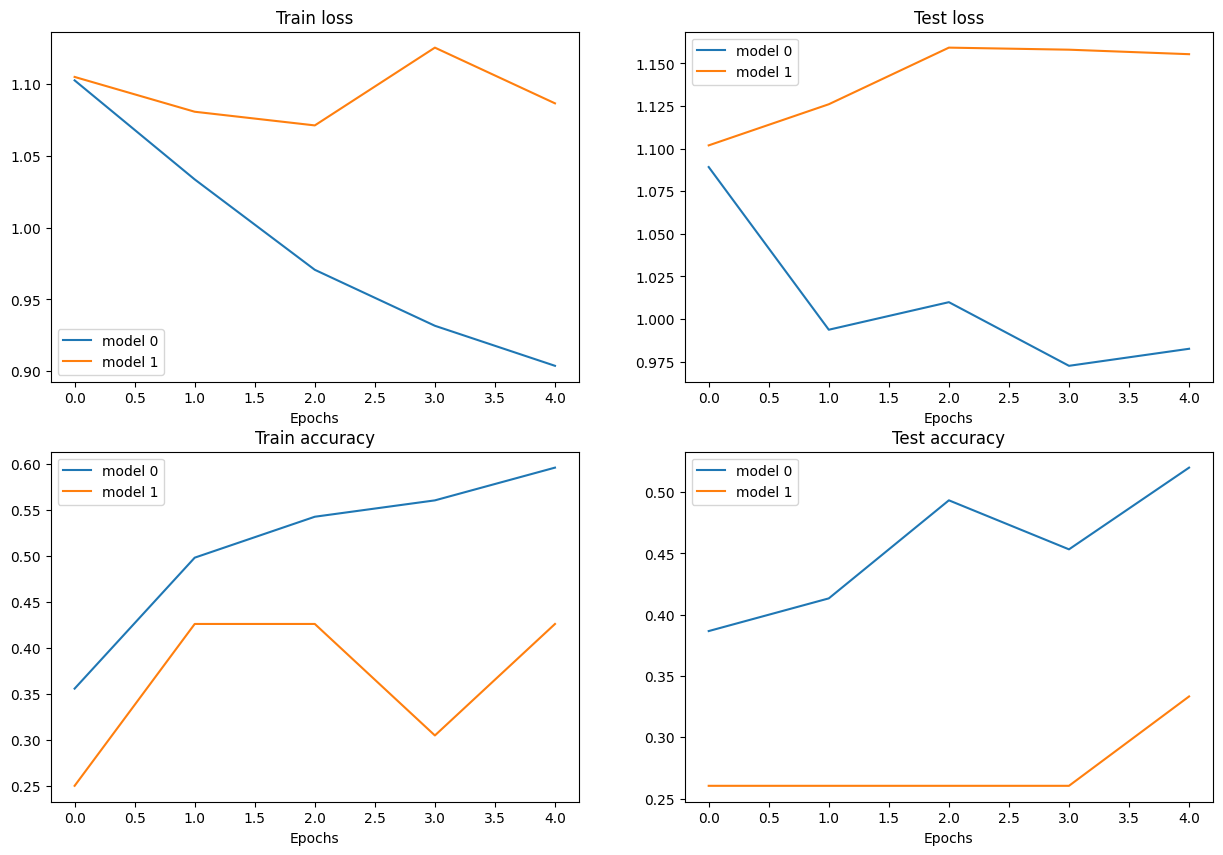

In [ ]:
# Setup a plot
plt.figure(figsize=(15, 10))

# get number of epochs
epochs = range(len(model_0_df))

# plot train loss
plt.subplot(2, 2, 1)
plt.plot(epochs, model_0_df["train_loss"], label="model 0")
plt.plot(epochs, model_1_df["train_loss"], label="model 1")
plt.title("Train loss")
plt.xlabel("Epochs")
plt.legend()

# plot test loss
plt.subplot(2, 2, 2)
plt.plot(epochs, model_0_df["test_loss"], label="model 0")
plt.plot(epochs, model_1_df["test_loss"], label="model 1")
plt.title("Test loss")
plt.xlabel("Epochs")
plt.legend()

# plot train Accuracy
plt.subplot(2, 2, 3)
plt.plot(epochs, model_0_df["train_acc"], label="model 0")
plt.plot(epochs, model_1_df["train_acc"], label="model 1")
plt.title("Train accuracy")
plt.xlabel("Epochs")
plt.legend()

# plot test Accuracy
plt.subplot(2, 2, 4)
plt.plot(epochs, model_0_df["test_acc"], label="model 0")
plt.plot(epochs, model_1_df["test_acc"], label="model 1")
plt.title("Test accuracy")
plt.xlabel("Epochs")
plt.legend()

## 11. Making a prediction on a custom image

Although we've trained a model on custom data... How do you make a prediction on a sample/image thats not in either training or testing dataset

In [ ]:
# download custom image
import requests

# setup custom image path
custom_image_path = data_path / "04-sushi-google.jpeg"

# download the image if it doesnt already exist
if not custom_image_path.is_file():
  with open(custom_image_path, "wb") as f:
    # When downloading from github,  need to use the raw file link
    url = "https://asianinspirations.com.au/wp-content/uploads/2021/03/How-to-make-your-own-sushi-rolls_00-Feat-Img.jpg"  # Replace with the actual raw image URL
    request = requests.get(url)
    print(f"Downloading {custom_image_path}...")
    f.write(request.content)
else:
  print(f"{custom_image_path} already exist, skipping download")

data/04-sushi-google.jpeg already exist, skipping download


## 11.1 Loading in a custom image with pytorch

We have to make sure our custom image is in the same format as the data our model was trained on

* In tensor form with datatype (torch.float32)
* Of shape 64*64*3
* On the right device

In [ ]:
custom_image_path

PosixPath('data/04-sushi-google.jpeg')

In [ ]:
import torchvision

# Read in custom image
custom_image_unint8 = torchvision.io.read_image(str(custom_image_path))
print(f"Custom image tensor:\n {custom_image_unint8}")
print(f"Custom image shape: {custom_image_unint8.shape}")
print(f"Custom image datatype: {custom_image_unint8.dtype}")

Custom image tensor:
 tensor([[[101, 102, 102,  ...,  27,  29,  30],
         [ 99,  99,  99,  ...,  28,  30,  31],
         [ 97,  97,  98,  ...,  29,  29,  32],
         ...,
         [ 62,  64,  65,  ..., 181, 184, 185],
         [ 61,  63,  64,  ..., 181, 181, 183],
         [ 60,  62,  64,  ..., 181, 180, 181]],

        [[ 93,  91,  91,  ...,  25,  25,  26],
         [ 91,  91,  91,  ...,  26,  26,  26],
         [ 89,  89,  92,  ...,  29,  27,  27],
         ...,
         [ 53,  55,  56,  ...,  44,  43,  42],
         [ 52,  54,  55,  ...,  42,  42,  42],
         [ 53,  53,  54,  ...,  40,  41,  42]],

        [[ 74,  73,  73,  ...,  26,  26,  27],
         [ 72,  72,  70,  ...,  27,  27,  30],
         [ 70,  70,  70,  ...,  29,  30,  31],
         ...,
         [ 48,  48,  49,  ...,  25,  25,  25],
         [ 45,  47,  46,  ...,  23,  23,  24],
         [ 45,  44,  45,  ...,  22,  22,  23]]], dtype=torch.uint8)
Custom image shape: torch.Size([3, 1280, 1920])
Custom image data

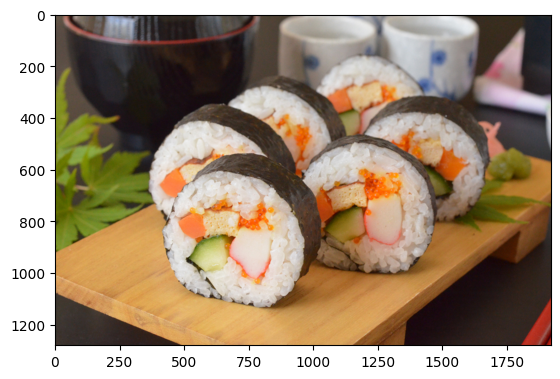

In [ ]:
plt.imshow(custom_image_unint8.permute(1, 2, 0))

### 11.2 Making a prediction on a custom image with a trained pytorch model

In [ ]:
# Try to make a prediction on an image in uint8 format
model_1.eval()
with torch.inference_mode():
  model_1(custom_image_unint8)

RuntimeError: Input type (unsigned char) and bias type (float) should be the same

In [ ]:
# Load in the custom image and convert it to torch.float32
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32) / 255 # to put our numbers between 0 - 1
custom_image

In [ ]:
plt.imshow(custom_image.permute(1, 2, 0))

In [ ]:
# Try to make a prediction on an image in float32 format
model_1.eval()
with torch.inference_mode():
  model_1(custom_image)

In [ ]:
custom_image.shape

In [ ]:
# Create tranfsform pipeline to resize image
from torchvision import transforms
custom_image_transform = transforms.Compose([
                                             transforms.Resize(size=(64, 64))
])

# transform our target image
custom_image_transformed = custom_image_transform(custom_image)

# Print out the shapes
print(f"Original shape: {custom_image.shape}")
print(f"transformed shape: {custom_image_transformed.shape}")

In [ ]:
plt.imshow(custom_image_transformed.permute(1, 2, 0))

In [ ]:
# This will error because there is no batch size
model_1.eval()
with torch.inference_mode():
  custom_image_pred = model_1(custom_image_transformed)


In [ ]:
# We can add a batch by unsqueezing it on the 0th dimension
custom_image_transformed.shape, custom_image_transformed.unsqueeze(0).shape

In [ ]:
# This should work we added a batch size
model_1.eval()
with torch.inference_mode():
  custom_image_pred = model_1(custom_image_transformed.unsqueeze(0))
custom_image_pred, class_names


Note, to make a prediction on a custom image we had to:
* Load the image and turn it into a tensor
* Make sure the image was the same datatype as the model (torch.float32)
* Make sure the image was the same shape as the data the model was trained on (3, 64, 64) with a batch size ... (1, 3, 64, 64)
* Make sure the image was on the same device as our model

In [ ]:
# Convert logits -> prediction probabilities
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
custom_image_pred_probs


In [ ]:
custom_image_pred_labels = torch.argmax(custom_image_pred_probs, dim=1)
class_names[custom_image_pred_labels]


### 11.3 Putting custom image prediction together: building a function

ideal outcome:
a function where we pass an image path to and have our model predict on that image + prediction


In [ ]:
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str] = None,
                        transform=None,
                        device=device):
  """ Makes a prediction on a target image with a trained model and plots the image and prediction."""
  # load in the image
  target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)

  # Divide the image pixel values by 255 to get them between [0, 1]
  target_image = target_image / 255

  # Transform if necessary
  if transform:
    target_image = transform(target_image)

  # make sure the model is on the target device
  model.to(device)

  # Turn on eval/inference_mode and make a prediction
  model.eval()
  with torch.inference_mode():
    # add an extra dimension to the image (this is the batch dimension, e.g our model will predict on batches of 1x image)
    target_image = target_image.unsqueeze(0)

    # Make a prediction on the image with an extra dimension
    target_image_pred = model(target_image.to(device))

  # Convert logits -> prediction probabilities
  target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

  # Convert prediction probabilities -> prediction labels
  target_image_pred_labels = torch.argmax(target_image_pred_probs, dim=1)

  # plot the image alongside the prediction and prediction probability
  plt.imshow(target_image.squeeze().permute(1, 2, 0)) # remove batch dimension and rearrange shape to be HWC
  if class_names:
    title = f"Pred: {class_names[target_image_pred_labels]} | Prob: {target_image_pred_probs.max():.3f}"
  else:
    title = f"Pred: {taget_image_pred_labels} | Prob: {target_image_pred_probs.max():.3f}"
  plt.title(title)
  plt.axis("off")



In [ ]:
# Pred on our custom image
pred_and_plot_image(model=model_1,
                    image_path=custom_image_path,
                    class_names=class_names,
                    transform=custom_image_transform,
                    device=device)

In [ ]:
## Exercises and extra curriculum

### 1. Our models are underperforming (not fitting the data well). What are 3 methods for preventing underfitting? Write them down and explain each with a sentence.

1. Decrease regularization - this allows you to increase the variation in your data making the data more complex, and allowing for a better trained model.
2. Increase the duration of training - by training the model for longer you give more chances to gather information from the data
3. Feature selection - add more features or features with higher importance, (eg. more hidden units) by doing this you make the model more complex yielding a better training result.


### 2. Recreate the data loading functions we built in sections 1, 2, 3 and 4 of notebook 04. You should have train and test DataLoader's ready to use.

In [ ]:
import requests
import zipfile
from pathlib import Path

data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If our image doesnt exists download and prepare it...
if image_path.is_dir():
  print(f"{image_path} already exists... skipping the download")
else:
  print(f"{image_path} does not exists... downloading it")
  image_path.mkdir(parents=True, exist_ok=True)

# download pizza and steak and sushi data
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  url = "https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip"
  request = requests.get(url)
  print(f"Downloading pizza, steak, sushi data....")
  f.write(request.content)

with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  print("Unzipping pizza, steak, and sushi data...")
  zip_ref.extractall(image_path)


data/pizza_steak_sushi does not exists... downloading it
Unzipping pizza, steak, and sushi data...


In [ ]:
import os

def walk_through_dir(dir_path):
  """ Walks through dir_path returns its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")



In [ ]:
walk_through_dir(image_path)

There are 2 directories and 0 images in data/pizza_steak_sushi
There are 3 directories and 0 images in data/pizza_steak_sushi/test
There are 0 directories and 19 images in data/pizza_steak_sushi/test/steak
There are 0 directories and 25 images in data/pizza_steak_sushi/test/pizza
There are 0 directories and 31 images in data/pizza_steak_sushi/test/sushi
There are 3 directories and 0 images in data/pizza_steak_sushi/train
There are 0 directories and 75 images in data/pizza_steak_sushi/train/steak
There are 0 directories and 78 images in data/pizza_steak_sushi/train/pizza
There are 0 directories and 72 images in data/pizza_steak_sushi/train/sushi


In [ ]:
# Set up train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

Random Image path: data/pizza_steak_sushi_20_percent/test/pizza/296426.jpg
image class: pizza
image height: 512
image width: 382


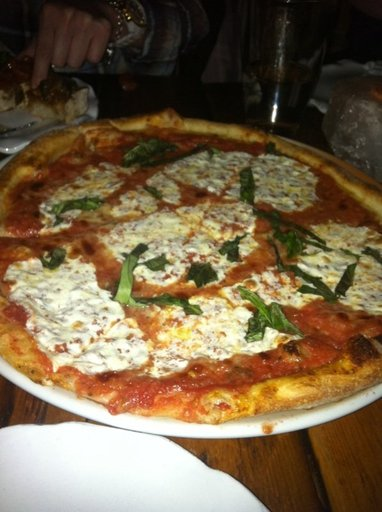

In [ ]:
import random
from PIL import Image

# set the random seed
# random.seed(42)

# get all the image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# pick a random image path
random_image_path = random.choice(image_path_list)

# get image class from path name
image_class = random_image_path.parent.stem

# open the image
img = Image.open(random_image_path)

# print the meta data
print(f"Random Image path: {random_image_path}")
print(f"image class: {image_class}")
print(f"image height: {img.height}")
print(f"image width: {img.width}")
img

(-0.5, 511.5, 511.5, -0.5)

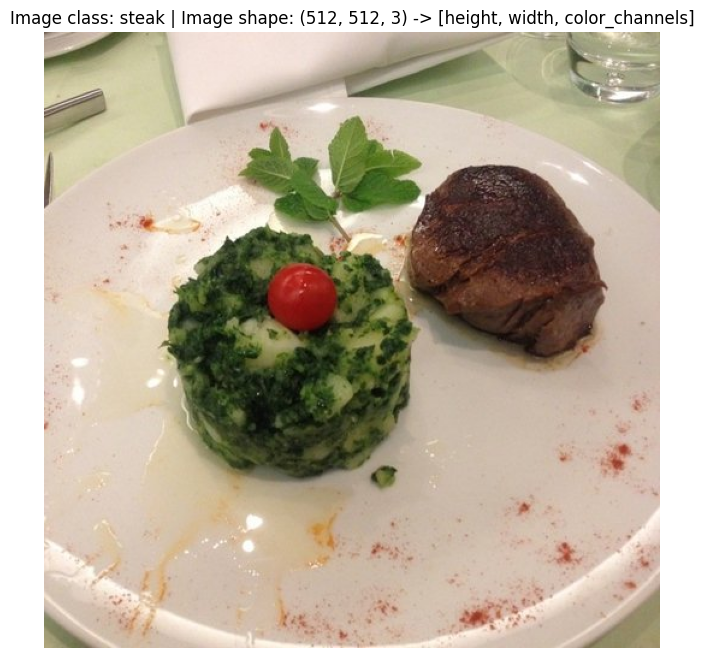

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# turn the image into and array
img_as_array = np.asarray(img)

# plot the image in matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis("off")

In [ ]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# write a transform for image
data_transform = transforms.Compose([
                                     transforms.Resize(size=(64, 64)),
                                     transforms.ToTensor()
])

from torchvision import datasets

train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,
                                  target_transform=None)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                ToTensor()
            ))

In [ ]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [ ]:
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
# Turn train and test data into dataloader's
from torch.utils.data import DataLoader

BATCH_SIZE = 1

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=os.cpu_count(),
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=os.cpu_count(),
                             shuffle=False)

In [ ]:
len(test_dataloader), len(train_dataloader)

(75, 225)

### 3. Recreate model_0 we built in section 7 of notebook 04.


In [ ]:
import torch
from torch import nn

class TinyVGGV2(nn.Module):
  """
  Model architeture copying the CNN explainer
  """
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
        )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*53*53,
                  out_features=output_shape)
    )


  def forward(self, x):
    x = self.conv_block_1(x)
    # print(x.shape)
    x = self.conv_block_2(x)
    # print(x.shape)
    x = self.classifier(x)
    # print(x.shape)
    return x


In [ ]:
img_transformed = data_transform(img)
img_transformed

tensor([[[0.6902, 0.7216, 0.7333,  ..., 0.7412, 0.6706, 0.6510],
         [0.7255, 0.7412, 0.7373,  ..., 0.7176, 0.6824, 0.6510],
         [0.5882, 0.5020, 0.4196,  ..., 0.6824, 0.6824, 0.6745],
         ...,
         [0.5333, 0.6196, 0.7765,  ..., 0.5804, 0.5843, 0.6000],
         [0.5843, 0.5176, 0.5569,  ..., 0.5843, 0.6118, 0.6196],
         [0.6510, 0.5765, 0.4824,  ..., 0.6078, 0.6314, 0.6235]],

        [[0.6275, 0.6588, 0.6667,  ..., 0.7176, 0.6549, 0.6353],
         [0.6588, 0.6784, 0.6863,  ..., 0.7059, 0.6784, 0.6471],
         [0.5608, 0.4980, 0.4431,  ..., 0.6902, 0.6902, 0.6745],
         ...,
         [0.5333, 0.5882, 0.7137,  ..., 0.5451, 0.5529, 0.5725],
         [0.5725, 0.5137, 0.5294,  ..., 0.5529, 0.5725, 0.5843],
         [0.6235, 0.5608, 0.4863,  ..., 0.5647, 0.5804, 0.5765]],

        [[0.5725, 0.6039, 0.6078,  ..., 0.5843, 0.5255, 0.5059],
         [0.6000, 0.6118, 0.6078,  ..., 0.5804, 0.5490, 0.5176],
         [0.4588, 0.3725, 0.2863,  ..., 0.5569, 0.5529, 0.

In [ ]:
model_0 = TinyVGGV2(input_shape=3,
                    hidden_units=10,
                    output_shape=len(class_names))

model_0

TinyVGGV2(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=28090, out_features=3, bias=True)
  )
)

In [ ]:
model_0(img_transformed)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (10x16 and 160x3)

In [ ]:
img_transformed.shape

torch.Size([1, 3, 64, 64])

In [ ]:
train_data[0][0].shape

torch.Size([3, 64, 64])

In [ ]:
img_custom, label_custom = next(iter(train_dataloader))
img_custom.shape


torch.Size([1, 3, 64, 64])

In [ ]:
img_transformed.unsqueeze(dim=0).shape

torch.Size([1, 3, 64, 64])

In [ ]:
model_0(img_custom)

tensor([[0.0520, 0.0488, 0.0985]], grad_fn=<AddmmBackward0>)

In [ ]:
img_transformed = img_transformed.squeeze(dim=0)
img_transformed.shape
# model_0(img_transformed)

torch.Size([1, 3, 64, 64])

In [ ]:
model_0(img_transformed)

tensor([[ 0.0312, -0.0207,  0.0058]], grad_fn=<AddmmBackward0>)

### 4. Create training and testing functions for model_0.


In [ ]:
TASK = "multiclass"
accuracy = Accuracy(task=TASK, num_classes=3)

def train_step_2(model: torch.nn.Module,
                 dataloader: torch.utils.data.DataLoader,
                 loss_fn: torch.nn.Module,
                 optimizer: torch.optim.Optimizer):
  # put the model in training mode
  model.train()

  # set up train loss and train accuracy
  train_loss, train_acc = 0, 0

  # Loop through the dataloader data batches
  for batch, (X, y) in enumerate(dataloader):

    # forward pass
    y_pred = model(X)

    # calculate the loss
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    # optimizer zero grad
    optimizer.zero_grad()

    # Loss backwards
    loss.backward

    # Optimizer step
    optimizer.step()

    y_pred_labels = y_pred.argmax(dim=1)
    acc = accuracy(preds=y_pred_labels,
                   target=y)
    train_acc += acc.item()

  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc


In [ ]:
def test_step_2(model: torch.nn.Module,
                dataloader: torch.utils.data.DataLoader,
                loss_fn: torch.nn.Module):
  # put model in evaluation mode
  model.eval()

  # setup the test loss and test acc
  test_loss, test_acc = 0, 0

  # turn on inference mode
  with torch.inference_mode():
    # loop through the dataloader batches
    for batch, (X, y) in enumerate(dataloader):
      # do the forward pass
      test_pred = model(X)

      # calculate the loss
      loss = loss_fn(test_pred, y)
      test_loss += loss.item()

      # calculate the acc
      test_pred_labels = test_pred.argmax(dim=1)
      acc = accuracy(test_pred_labels,
                     y)
      test_acc += acc.item()

  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc


In [ ]:
try:
  import torchmetrics
  print('found torchmetrics importing it...')
except:
  !pip install torchmetrics
  import torchmetrics
  from torchmetrics import Accuracy
  print("torchmetrics wasnt found, downloading and importing it...")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.4/840.4 kB 5.2 MB/s eta 0:00:00
torchmetrics wasnt found, downloading and importing it...


In [ ]:
TASK = "multiclass"
accuracy = Accuracy(task=TASK, num_classes=3)

In [ ]:
pred_prac = model_0(img_custom)
pred_prac

tensor([[0.0520, 0.0488, 0.0985]], grad_fn=<AddmmBackward0>)

In [ ]:
# from tqdm.auto import tqdm

# # 1. Create a train function that takes in various model parameters + optimizer + dataloaders + loss function
# def train(model: torch.nn.Module,
#           train_dataloader,
#           test_dataloader,
#           optimizer: torch.optim.Optimizer,
#           loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
#           epochs: int = 5,
#           device = device):

#   # 2. Create empty results dictionary
#   results = {"train_loss": [],
#              "train_acc": [],
#              "test_loss": [],
#              "test_acc": []}

#   # 3. Loop through training and testing steps for a number of epochs
#   for epoch in tqdm(range(epochs)):
#     train_loss, train_acc = train_step(model=model,
#                                        dataloader=train_dataloader,
#                                        loss_fn=loss_fn,
#                                        optimizer=optimizer,
#                                        device=device)

#     test_loss, test_acc = test_step(model=model,
#                                     dataloader=test_dataloader,
#                                     loss_fn=loss_fn,
#                                     device=device)

#     # 4. Print out whats happening
#     print(f"Epoch: {epoch} | Train loss: {train_loss:.4f} | Train accuracy: {train_acc:.4f}% | \nTest loss: {test_loss:.4f} | Test acc {test_acc:.4f}%")

#     # 5. update results dictionary
#     results["train_loss"].append(train_loss)
#     results["train_acc"].append(train_acc)
#     results["test_loss"].append(test_loss)
#     results["test_acc"].append(test_acc)

#   # 6. Return the filled results at the end of the epochs
#   return results

from tqdm.auto import tqdm

# 1. Create a train function that takes in various model parameters + optimizer + dataloaders + loss function
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

  # create a results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  # Loop through the training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model= model,
                                       dataloader= train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer= optimizer)

    test_loss, test_acc = test_step(model=model,
                                      dataloader= test_dataloader,
                                      loss_fn= loss_fn)

    # Print out whats happening
    print(f"Epoch: {epoch} | Train loss: {train_loss:.4f} | Train acc: {train_acc:.4f}% | \nTest loss: {test_loss:.4f} | Test acc: {test_acc:.4f}%")

    # update the results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  return results



In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                            lr=0.001)

NameError: name 'model_0' is not defined

In [ ]:
train(model=model_0,
      train_dataloader=train_dataloader,
      test_dataloader=test_dataloader,
      optimizer=optimizer,
      loss_fn=loss_fn)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 1.0207 | Train acc: 0.4800% | 
Test loss: 1.0156 | Test acc: 0.4800%
Epoch: 1 | Train loss: 0.9318 | Train acc: 0.5778% | 
Test loss: 0.9779 | Test acc: 0.4933%
Epoch: 2 | Train loss: 0.8816 | Train acc: 0.5911% | 
Test loss: 1.0499 | Test acc: 0.4400%
Epoch: 3 | Train loss: 0.8764 | Train acc: 0.6178% | 
Test loss: 1.0237 | Test acc: 0.4533%
Epoch: 4 | Train loss: 0.7807 | Train acc: 0.6489% | 
Test loss: 0.9945 | Test acc: 0.5467%


{'train_loss': [1.020723615222507,
  0.931795455051793,
  0.8816452358745867,
  0.8764124698936939,
  0.7806785979266796],
 'train_acc': [0.48,
  0.5777777777777777,
  0.5911111111111111,
  0.6177777777777778,
  0.6488888888888888],
 'test_loss': [1.015602164665858,
  0.9778619396686554,
  1.049883253177007,
  1.0236765348911285,
  0.9945223227143287],
 'test_acc': [0.48,
  0.49333333333333335,
  0.44,
  0.4533333333333333,
  0.5466666666666666]}

In [ ]:
train_dataloader

In [ ]:
model_0 = TinyVGGV2(input_shape=3,
                    hidden_units=12,
                    output_shape=len(class_names))

model_0

TinyVGGV2(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 12, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(12, 12, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(12, 12, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(12, 12, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2028, out_features=3, bias=True)
  )
)

### 5. Try training the model you made in exercise 3 for 5, 20 and 50 epochs, what happens to the results?

The model is overfitting to the training data and not really learning on our testing data

### 6. Double the number of hidden units in your model and train it for 20 epochs, what happens to the results?

our model is still overfitting to the data in our testing set

### 7. Double the data you're using with your model from step 6 and train it for 20 epochs, what happens to the results?
Note: You can use the custom data creation notebook to scale up your Food101 dataset.
You can also find the already formatted double data (20% instead of 10% subset) dataset on GitHub, you will need to write download code like in exercise 2 to get it into this notebook

In [ ]:
import requests
import zipfile
from pathlib import Path

data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi_20_percent"

# If our image doesnt exists download and prepare it...
if image_path.is_dir():
  print(f"{image_path} already exists... skipping the download")
else:
  print(f"{image_path} does not exists... downloading it")
  image_path.mkdir(parents=True, exist_ok=True)

# download pizza and steak and sushi data
with open(data_path / "pizza_steak_sushi_20_percent.zip", "wb") as f:
  url = "https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip"
  request = requests.get(url)
  print(f"Downloading pizza, steak, sushi 20 percent data....")
  f.write(request.content)

with zipfile.ZipFile(data_path / "pizza_steak_sushi_20_percent.zip", "r") as zip_ref:
  print("Unzipping pizza, steak, and sushi 20 percent data...")
  zip_ref.extractall(image_path)

data/pizza_steak_sushi_20_percent does not exists... downloading it
Unzipping pizza, steak, and sushi 20 percent data...


In [ ]:
walk_through_dir(image_path)

There are 2 directories and 0 images in data/pizza_steak_sushi_20_percent
There are 3 directories and 0 images in data/pizza_steak_sushi_20_percent/test
There are 0 directories and 58 images in data/pizza_steak_sushi_20_percent/test/steak
There are 0 directories and 46 images in data/pizza_steak_sushi_20_percent/test/pizza
There are 0 directories and 46 images in data/pizza_steak_sushi_20_percent/test/sushi
There are 3 directories and 0 images in data/pizza_steak_sushi_20_percent/train
There are 0 directories and 146 images in data/pizza_steak_sushi_20_percent/train/steak
There are 0 directories and 154 images in data/pizza_steak_sushi_20_percent/train/pizza
There are 0 directories and 150 images in data/pizza_steak_sushi_20_percent/train/sushi


In [ ]:
# # Set up train and testing paths
# train_dir = image_path / "train"
# test_dir = image_path / "test"

train_dir = image_path / "train"
test_dir = image_path / "test"

In [ ]:
data_transform = transforms.Compose([
                                     transforms.Resize(size=(224,224)),
                                     transforms.ToTensor()
])

train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,
                                  target_transform=None)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

train_data, test_data


(Dataset ImageFolder
     Number of datapoints: 450
     Root location: data/pizza_steak_sushi_20_percent/train
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 150
     Root location: data/pizza_steak_sushi_20_percent/test
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
                ToTensor()
            ))

In [ ]:
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=32,
                              shuffle=True,
                              num_workers=os.cpu_count())

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=32,
                             shuffle=False,
                             num_workers=os.cpu_count())

In [ ]:
len(train_dataloader), len(test_dataloader)

(15, 5)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)

In [ ]:
model_0 = TinyVGGV2(input_shape=3,
                    hidden_units=10,
                    output_shape=len(class_names))

model_0

TinyVGGV2(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=28090, out_features=3, bias=True)
  )
)

In [ ]:
train(model=model_0,
      train_dataloader=train_dataloader,
      test_dataloader=test_dataloader,
      optimizer=optimizer,
      loss_fn=loss_fn,
      epochs=5)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 0.9350 | Train acc: 0.5229% | 
Test loss: 0.9751 | Test acc: 0.5142%
Epoch: 1 | Train loss: 0.9156 | Train acc: 0.5437% | 
Test loss: 0.9600 | Test acc: 0.5347%
Epoch: 2 | Train loss: 0.8395 | Train acc: 0.6042% | 
Test loss: 0.9615 | Test acc: 0.5091%
Epoch: 3 | Train loss: 0.8368 | Train acc: 0.6458% | 
Test loss: 0.9325 | Test acc: 0.5153%
Epoch: 4 | Train loss: 0.8077 | Train acc: 0.6562% | 
Test loss: 0.9047 | Test acc: 0.5318%


{'train_loss': [0.9350406964619954,
  0.9155561765034993,
  0.8395092099905014,
  0.8367921789487203,
  0.8076983372370402],
 'train_acc': [0.5229166666666667,
  0.54375,
  0.6041666666666666,
  0.6458333333333334,
  0.65625],
 'test_loss': [0.9751055479049683,
  0.960009241104126,
  0.9614507794380188,
  0.9324568510055542,
  0.9046516060829163],
 'test_acc': [0.5142045454545454,
  0.5346590909090909,
  0.509090909090909,
  0.5153409090909091,
  0.5318181818181819]}

In [ ]:
img_transformed = img.squeeze(dim=0)
img_transformed.shape

AttributeError: squeeze

In [ ]:
img_transformed = data_transform(img)
img_transformed.shape

torch.Size([3, 224, 224])

In [ ]:
img_transformed = img_transformed.unsqueeze(dim=0)
img_transformed.shape

torch.Size([1, 3, 224, 224])

In [ ]:
model_0(img_transformed)

torch.Size([1, 10, 110, 110])
torch.Size([1, 10, 53, 53])
torch.Size([1, 3])


tensor([[-0.0102,  0.0249,  0.0146]], grad_fn=<AddmmBackward0>)

### 8. Make a prediction on your own custom image of pizza/steak/sushi (you could even download one from the internet) with your trained model from exercise 7 and share your prediction.
- Does the model you trained in exercise 7 get it right?
- f not, what do you think you could do to improve it?

In [ ]:
# download custom image
import requests

# setup custom image path
custom_image_path = data_path / "04-sushi-google.jpeg"

# download the image if it doesnt already exist
if not custom_image_path.is_file():
  with open(custom_image_path, "wb") as f:
    # When downloading from github,  need to use the raw file link
    url = "https://asianinspirations.com.au/wp-content/uploads/2021/03/How-to-make-your-own-sushi-rolls_00-Feat-Img.jpg"  # Replace with the actual raw image URL
    request = requests.get(url)
    print(f"Downloading {custom_image_path}...")
    f.write(request.content)
else:
  print(f"{custom_image_path} already exist, skipping download")



In [ ]:
# import torchvision

# # Read in custom image
# custom_image_unint8 = torchvision.io.read_image(str(custom_image_path))
# print(f"Custom image tensor:\n {custom_image_unint8}")
# print(f"Custom image shape: {custom_image_unint8.shape}")
# print(f"Custom image datatype: {custom_image_unint8.dtype}")

import torchvision
# read in custom image
custom_image_unint8 = torchvision.io.read_image(str(custom_image_path))
print(f"Custom image tensor:\n {custom_image_unint8}")
print(f"Custom image shape: {custom_image_unint8.shape}")
print(f"Custom image dtype: {custom_image_unint8.dtype}")

Custom image tensor:
 tensor([[[101, 102, 102,  ...,  27,  29,  30],
         [ 99,  99,  99,  ...,  28,  30,  31],
         [ 97,  97,  98,  ...,  29,  29,  32],
         ...,
         [ 62,  64,  65,  ..., 181, 184, 185],
         [ 61,  63,  64,  ..., 181, 181, 183],
         [ 60,  62,  64,  ..., 181, 180, 181]],

        [[ 93,  91,  91,  ...,  25,  25,  26],
         [ 91,  91,  91,  ...,  26,  26,  26],
         [ 89,  89,  92,  ...,  29,  27,  27],
         ...,
         [ 53,  55,  56,  ...,  44,  43,  42],
         [ 52,  54,  55,  ...,  42,  42,  42],
         [ 53,  53,  54,  ...,  40,  41,  42]],

        [[ 74,  73,  73,  ...,  26,  26,  27],
         [ 72,  72,  70,  ...,  27,  27,  30],
         [ 70,  70,  70,  ...,  29,  30,  31],
         ...,
         [ 48,  48,  49,  ...,  25,  25,  25],
         [ 45,  47,  46,  ...,  23,  23,  24],
         [ 45,  44,  45,  ...,  22,  22,  23]]], dtype=torch.uint8)
Custom image shape: torch.Size([3, 1280, 1920])
Custom image dtyp

In [ ]:
custom_image = custom_image_unint8.type(torch.float32)

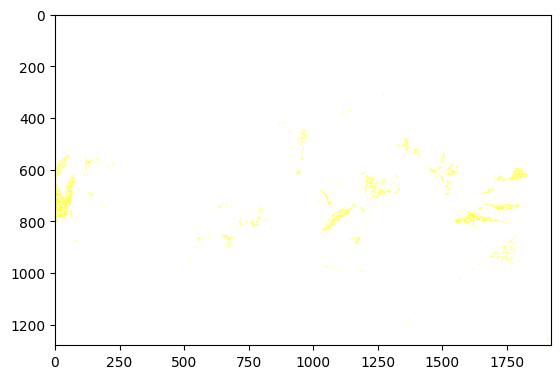

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(custom_image.permute(1, 2, 0))

In [ ]:
custom_image_transform = transforms.Compose([
                                             transforms.Resize(size=(224, 224))
])

custom_image_transformed = custom_image_transform(custom_image)

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [ ]:
custom_image_pred = model_0(custom_image_transformed.unsqueeze(dim=0)).argmax()
class_names[custom_image_pred]

'sushi'

In [ ]:
custom_image_transformed.unsqueeze(dim=0).shape

torch.Size([1, 3, 224, 224])